Group 2 Data 607 project : Credit Card Fraud Transaction

Team Members :  
Ying YU, Chibuzo Oha, Cecil Oiku and Anthony Obi

## Introduction:

Credit card fraud remains a major concern in the financial sector, causing substantial losses for both card issuers and consumers. According to recent data from WalletHub, over $34 billion is lost annually to credit card fraud — a number that is expected to rise as digital transactions continue to grow.

The goal of this project is to combat credit card fraud by developing a predictive model capable of identifying potentially fraudulent transactions in real time. Such a model can empower banks and card issuers to flag suspicious activity early and implement targeted fraud prevention strategies.

The dataset used for this project was sourced from Kaggle: Credit Card Fraud Dataset. It includes 1,000,000 transaction records and 8 features, such as distance from home, distance from the last transaction, PIN usage, the ratio of transaction amount to median purchase price, whether the retailer is a repeat vendor, the type of transaction (credit card or online), and a label indicating whether the transaction was fraudulent.

## Explanation of each feature:

(1) distance_from_home: The physical distance (in km or miles) between the customer’s home address and the location of the transaction. Unusual distances may indicate potential fraud - for example the user travelled to another country and used the credit card there.

(2) distance_from_last_transaction: The distance between the current transaction and the previous one. Large jumps in distance in a short time may be suspicious.

(3) used_pin_number: A binary indicator (1 or 0) of whether the customer used their personal identification number (PIN) for the transaction. PIN usage usually increases transaction legitimacy.

(4) used_chip: Indicates whether the chip on the credit/debit card was used. Chip transactions are typically more secure than swiped or manual entries.

(5) online_order: Indicates whether the transaction occurred online. Online transactions are generally more prone to fraud due to the lack of physical verification.

(6) repeat_retailer: A binary variable showing whether the customer has shopped with the same retailer before. Fraud is more likely with unfamiliar vendors.

(7) ratio_to_median_purchase_price: The ratio of the transaction amount to the customer’s median historical purchase amount. Transactions far above the norm can signal fraud.

(9) fraud (target variable): A binary label where 1 indicates a fraudulent transaction and 0 indicates a legitimate one.

By leveraging this data, our project aims to contribute to smarter fraud detection systems that protect both institutions and consumers.

## Part 1 -Exploratory Data Analysis (EDA): 

First, we will perform EDA to understand the data distribution, identify trends, and detect outliers. 
Visualize relationships between variables to guide feature and model development.

In [3]:
# import necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Great for heatmaps

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    mean_squared_error,
    f1_score,
    confusion_matrix,
    precision_score
)

In [4]:
# Load the  Credit card transaction data


df = pd.read_csv('card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
df.shape

(1000000, 8)

In [6]:
# Check for missing values
print(df.isnull().sum())

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


In [7]:
# Checking dataset structures
print ("Dataset features:" ,df.columns.to_list, '\n' )
print ("Dataset dimension:", df.shape, '\n' )
print ("Descritive Statistic:" , df.describe(),)

print ("Data Strusture:" , df.info())


Dataset features: <bound method IndexOpsMixin.tolist of Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')> 

Dataset dimension: (1000000, 8) 

Descritive Statistic:        distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000

In [8]:
# Checking for Duplicates and Missing Data
count_missing = df.isna().sum()
count_dup= df.duplicated().sum()

print(count_missing,'\n')
print(count_dup)


distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64 

0


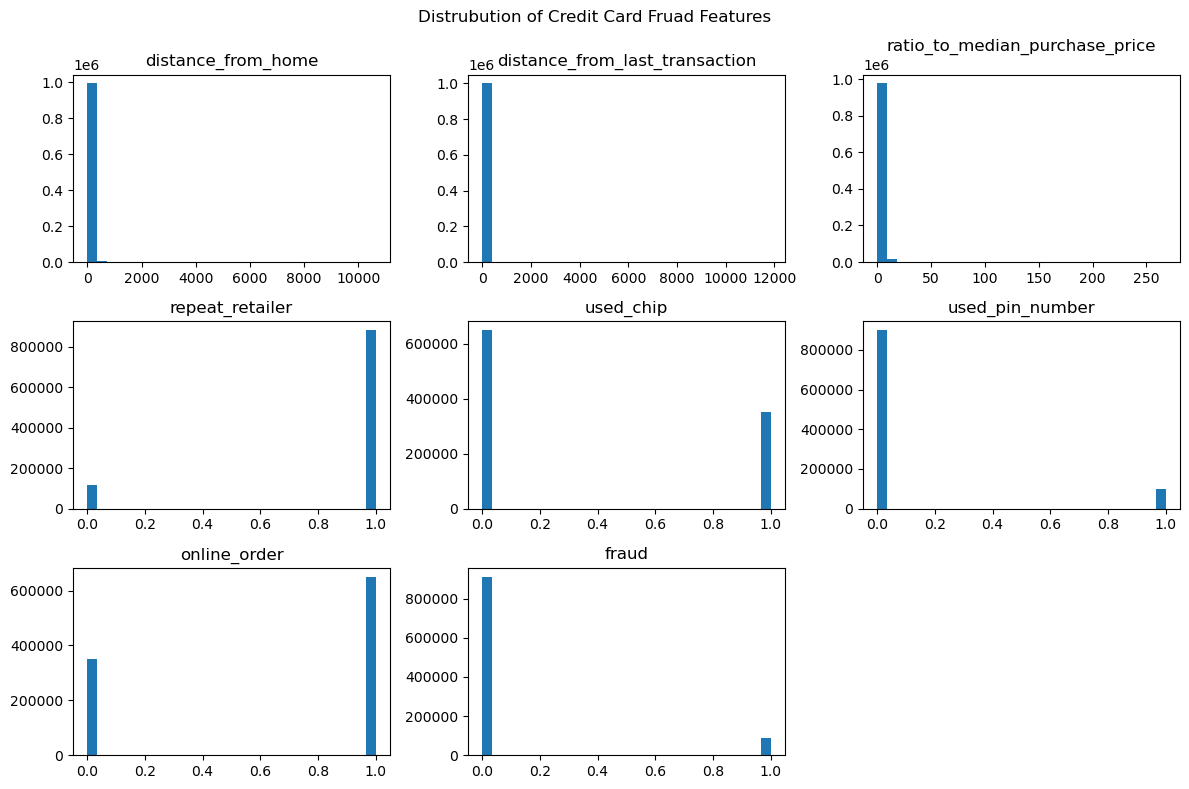

In [9]:
# Plotting a histogram for distribution of Credit Card fraud features

df.hist(figsize=(12, 8), bins=30, grid=False)
plt.suptitle('Distrubution of Credit Card Fruad Features')
plt.tight_layout()
plt.show()



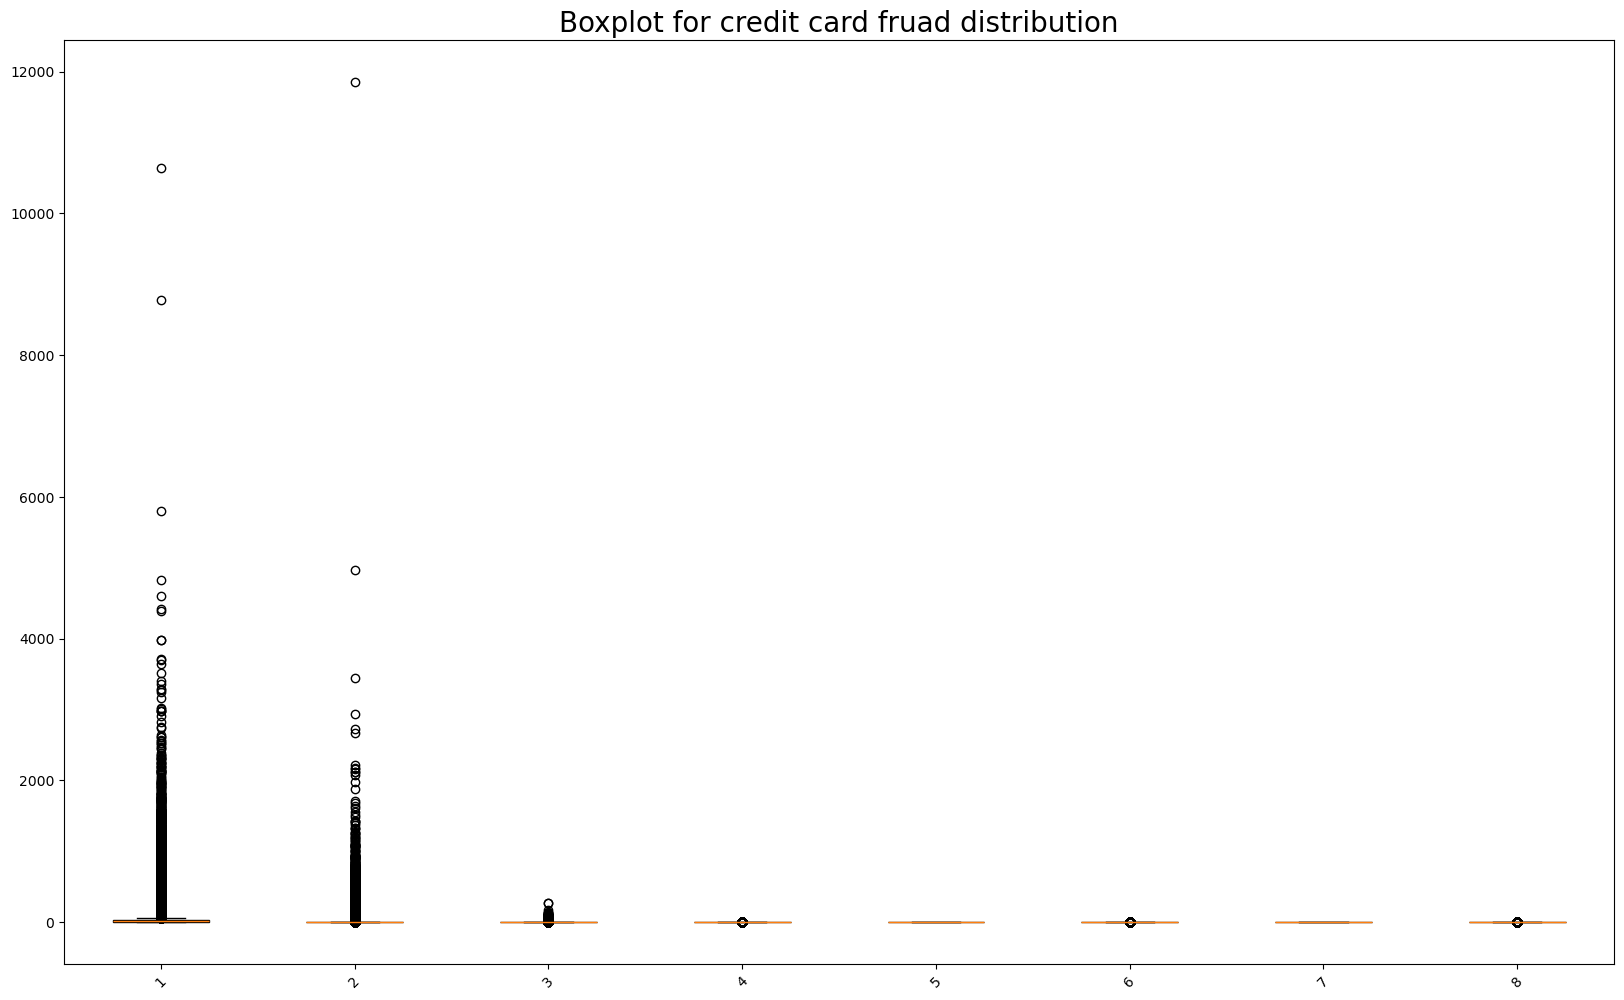

In [10]:
# Plotting the Boxplot for the distribution of Credit Card features

plt.figure(figsize=(20,12))


plt.boxplot(df,patch_artist=True,boxprops=dict(facecolor='skyblue')) 


plt.title("Boxplot for credit card fruad distribution",fontsize = 20)

plt.xticks(rotation =45)

plt.show()

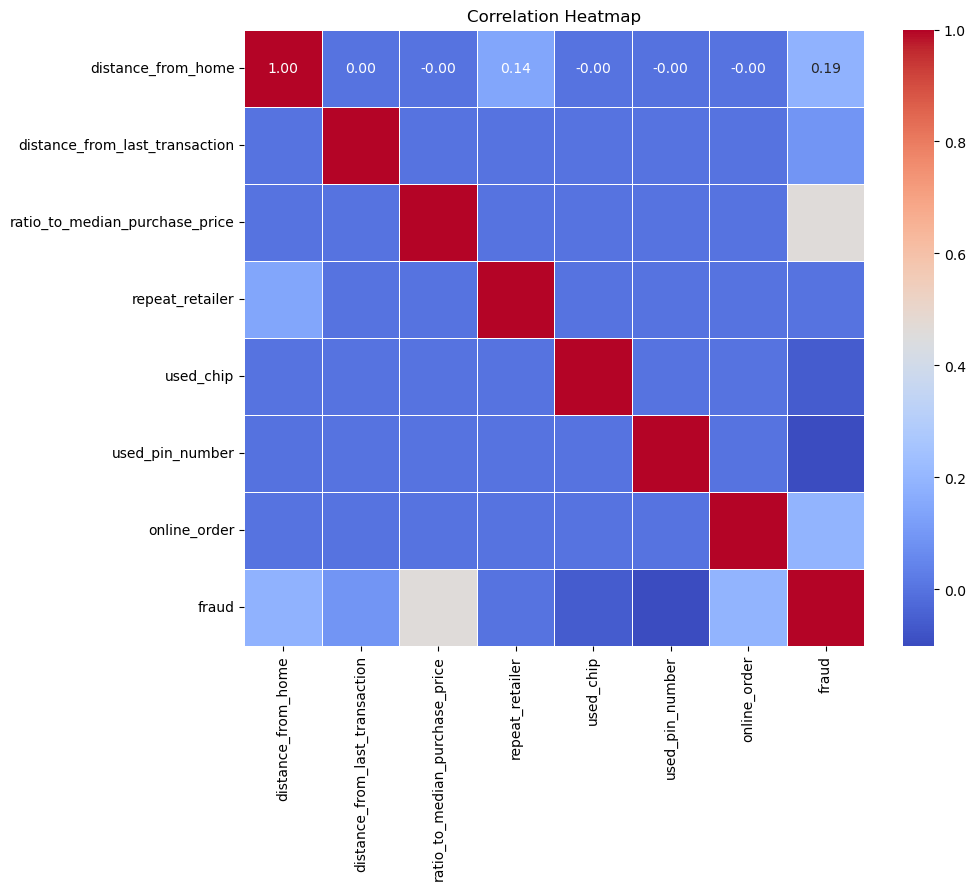

In [11]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Splitting the data in 80% train and 20% test 


# Define the x predictor variables
X= df.drop(columns=('fraud'),axis=1)


# Define y, target variable
y= df["fraud"]


# Split into train and test data 
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=42, test_size=0.2)


# Calcualte proportion of ham and spam in training set
count_fraud =(y_train==1).sum() # count the number of ham
count_geniune =(y_train==0).sum() # count the number of spam


prop_fraud= count_fraud/len(y_train) # propostion of ham
prop_genuine= count_geniune/len(y_train) # proprtion of spam

print('Proportion of Fraudlent Transactions:', round(prop_fraud,2))
print('Proportion of Genuine Transactions:',round(prop_genuine,2))


X_train.shape






Proportion of Fraudlent Transactions: 0.09
Proportion of Genuine Transactions: 0.91


(800000, 7)

In [13]:
# Standardize the X Features

# We will only standardize continous variabes 

X_train_continous= X_train[['distance_from_home', 'distance_from_last_transaction','ratio_to_median_purchase_price']]
X_test_continous= X_test[['distance_from_home', 'distance_from_last_transaction','ratio_to_median_purchase_price']]
# Initialize Standard Scaler Model

scaler = StandardScaler()

X_train_continous = scaler.fit_transform(X_train_continous)
X_test_continous= scaler.transform(X_test_continous)

# Convert to the scaled continous variables to Dataframe

# Reset index for scaled data

X_train_continous = pd.DataFrame(X_train_continous, 
                                 columns=['distance_from_home', 
                                          'distance_from_last_transaction', 
                                          'ratio_to_median_purchase_price']).reset_index(drop=True)

X_test_continous = pd.DataFrame(X_test_continous, 
                                columns=['distance_from_home', 
                                         'distance_from_last_transaction', 
                                         'ratio_to_median_purchase_price']).reset_index(drop=True)
# Combine Scaled Continuous Variables with Categorical Variables
X_train_s = pd.concat([
    X_train_continous, 
    X_train.drop(columns=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']).reset_index(drop=True)
], axis=1)

X_test_s = pd.concat([
    X_test_continous, 
    X_test.drop(columns=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']).reset_index(drop=True)
], axis=1)



print(f"X_train shape: {X_train.shape}")
print(f"X_train_s shape: {X_train_s.shape}")

X_train shape: (800000, 7)
X_train_s shape: (800000, 7)


In [14]:
print(X_train_continous.index)


RangeIndex(start=0, stop=800000, step=1)


In [15]:
print(X_train_continous.index)
print(X_train.drop(columns=['distance_from_home', 
                            'distance_from_last_transaction', 
                            'ratio_to_median_purchase_price']).index)


RangeIndex(start=0, stop=800000, step=1)
Int64Index([566853, 382311, 241519, 719220, 905718, 259727,  90029, 529300,
            570430, 720377,
            ...
            137337,  54886, 732180, 110268, 644167, 259178, 365838, 131932,
            671155, 121958],
           dtype='int64', length=800000)


## Logistics Regression Model For the Credit Transdata

Logistic Regression is a statistical model used for binary classification problems. It estimates the probability that a given input belongs to a particular category by applying the logistic (sigmoid) function to a linear combination of the input features. Logistic regression performs well when the relationship between the features and the target variable is approximately linear. Its strengths are its interpretability, speed, and effectiveness on linearly separable data.

In [18]:
# Define the x predictor variables
X= df.drop(columns=('fraud'),axis=1)

# Define y, target variable
y= df["fraud"]

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)

# Cross-validation before model fitting
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1')
print(f"Logistic Regression - Cross-validated F1 scores: {cv_scores}")
print(f"Logistic Regression - Mean F1 score: {cv_scores.mean():.4f}")
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression - Cross-validated F1 scores: [0.718573   0.71422687 0.72085474]
Logistic Regression - Mean F1 score: 0.7179
Confusion Matrix:
[[181279   1278]
 [  6991  10452]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.95    200000



In [20]:
# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Precision: TP / (TP + FP)
precision = TP / (TP + FP)

# Specificity: TN / (TN + FP)
specificity = TN / (TN + FP)

print(f"Precision: {precision:.4f}")
print(f"Specificity: {specificity:.4f}")

Precision: 0.8910
Specificity: 0.9930


In [21]:
from sklearn.metrics import accuracy_score, f1_score

# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy = accuracy_score(y_test, y_pred)

# F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")



Accuracy: 0.9587
F1 Score: 0.7166


In [22]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.0413


In [23]:
print(f"Logistics Regression Precision: {precision:.4f}")
print(f"Logistics Regression Specificity: {specificity:.4f}")
print(f"Logistics Regression Accuracy: {accuracy:.4f}")
print(f"Logistics Regression F1 Score: {f1:.4f}")
print(f"Logistics Regression Mean Squared Error (MSE): {mse:.4f}")

Logistics Regression Precision: 0.8910
Logistics Regression Specificity: 0.9930
Logistics Regression Accuracy: 0.9587
Logistics Regression F1 Score: 0.7166
Logistics Regression Mean Squared Error (MSE): 0.0413


## The Gradient Boost Model:

Gradient Boosting is an ensemble machine learning technique that builds a strong predictive model by combining multiple weak learners, typically decision trees. It works by training models sequentially, where each new model focuses on correcting the errors made by the previous ones. The "boosting" process minimizes a loss function by adding models that reduce the residuals. Gradient Boosting is especially powerful for classification tasks involving complex patterns and interactions in the data. It offers high accuracy but may require careful tuning to avoid overfitting.

In [25]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}
# Initialize the RandomSearch model
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_grid,
    n_iter=30,            # Limits combinations tested
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_s, y_train)
print("Best Parameters (Randomized Search):", random_search.best_params_)


Best Parameters (Randomized Search): {'subsample': 0.6, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 6, 'learning_rate': 0.05}


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the model with best-found parameters
gb_model = GradientBoostingClassifier(
    subsample=0.8,
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=5,
    max_features='sqrt',
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)

gb_model.fit(X_train_s, y_train)
y_pred = gb_model.predict(X_test_s)




In [27]:

print(f"accuracy {accuracy_score(y_test,y_pred)}")
print(f"accuracy {confusion_matrix(y_test,y_pred)}")
print(f"accuracy {classification_report(y_test,y_pred)}")


accuracy 0.999995
accuracy [[182557      0]
 [     1  17442]]
accuracy               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



In [28]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

# Compute sample weights (Inversely proportional to class distribution)
weights = np.where(y_train == 0, 1 / 0.91, 1 / 0.09)  # Class weights: Majority (0.91) / Minority (0.09)

# Train model with sample weights
balanced_model = GradientBoostingClassifier(
    subsample=0.8,
    n_estimators=20,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=20,
    min_samples_leaf=5,
    random_state=42
)

balanced_model.fit(X_train_s, y_train, sample_weight=weights)
y_pred = balanced_model.predict(X_test_s)


In [29]:
print(f"accuracy {accuracy_score(y_test,y_pred)}")
print(f"accuracy {confusion_matrix(y_test,y_pred)}")
print(f"accuracy {classification_report(y_test,y_pred)}")

accuracy 0.98782
accuracy [[180216   2341]
 [    95  17348]]
accuracy               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    182557
         1.0       0.88      0.99      0.93     17443

    accuracy                           0.99    200000
   macro avg       0.94      0.99      0.96    200000
weighted avg       0.99      0.99      0.99    200000



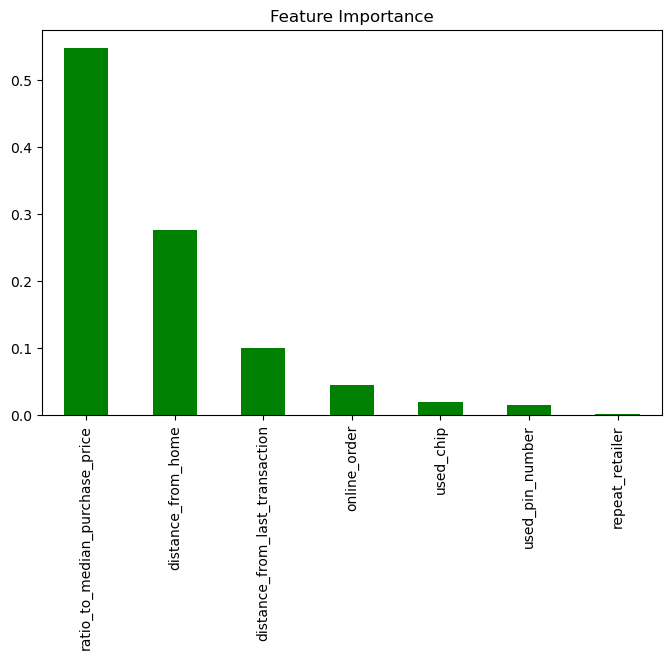

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(balanced_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
importances.plot(kind='bar', color='green')
plt.title('Feature Importance')
plt.show()


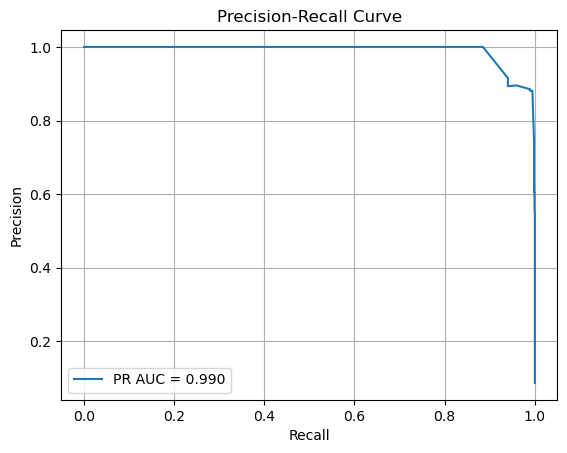

In [31]:
from sklearn.metrics import precision_recall_curve, auc

y_prob = balanced_model.predict_proba(X_test_s)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Add Gaussian noise to X_test_s
X_test_noisy = X_test_s + np.random.normal(0, 0.01, X_test_s.shape)

# Predict on noisy data
y_pred_noisy = balanced_model.predict(X_test_noisy)

# Evaluate performance
print("Accuracy on Noisy Data:", accuracy_score(y_test, y_pred_noisy))
print("\nClassification Report on Noisy Data:\n", classification_report(y_test, y_pred_noisy))


Accuracy on Noisy Data: 0.9865

Classification Report on Noisy Data:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    182557
         1.0       0.87      0.99      0.93     17443

    accuracy                           0.99    200000
   macro avg       0.94      0.99      0.96    200000
weighted avg       0.99      0.99      0.99    200000



In [33]:
balanced_model = GradientBoostingClassifier(
    subsample=0.8,
    n_estimators=50,         # Gradual increase for improved stability
    learning_rate=0.05,      # Lower learning rate to stabilize learning
    max_depth=3,             # Maintains controlled complexity
    min_samples_split=30,    # Requires larger groups for node splitting
    min_samples_leaf=10,     # Larger leaf size prevents overfitting
    random_state=42
)

balanced_model.fit(X_train_s, y_train, sample_weight=weights)
y_pred = balanced_model.predict(X_test_s)


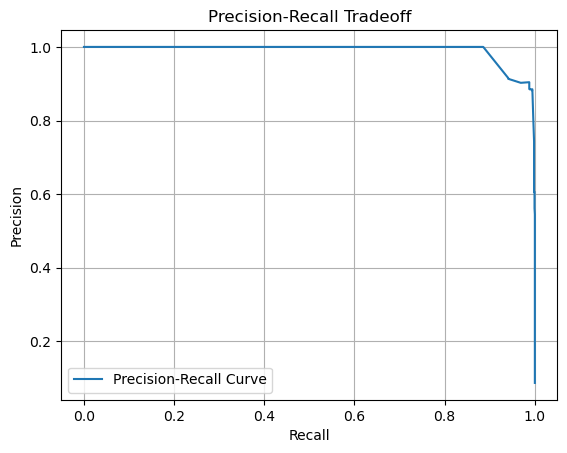

In [34]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

y_prob = balanced_model.predict_proba(X_test_s)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Tradeoff')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
# Add Gaussian noise to X_test_s
X_test_noisy = X_test_s + np.random.normal(0, 0.01, X_test_s.shape)

# Predict on noisy data
y_pred_noisy = balanced_model.predict(X_test_noisy)

# Evaluate performance
print("Accuracy on Noisy Data:", accuracy_score(y_test, y_pred_noisy))
print("\nClassification Report on Noisy Data:\n", classification_report(y_test, y_pred_noisy))



Accuracy on Noisy Data: 0.98659

Classification Report on Noisy Data:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    182557
         1.0       0.87      0.99      0.93     17443

    accuracy                           0.99    200000
   macro avg       0.94      0.99      0.96    200000
weighted avg       0.99      0.99      0.99    200000



In [36]:
from sklearn.metrics import classification_report

# Predict probabilities
y_prob = balanced_model.predict_proba(X_test_s)[:, 1]



# Set optimal threshold
threshold = 0.35
y_pred_threshold = (y_prob > threshold).astype(int)

# Evaluate performance
print("Classification Report on Custom Threshold:\n", classification_report(y_test, y_pred_threshold))


Classification Report on Custom Threshold:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    182557
         1.0       0.61      1.00      0.75     17443

    accuracy                           0.94    200000
   macro avg       0.80      0.97      0.86    200000
weighted avg       0.97      0.94      0.95    200000



In [37]:
thresholds = [0.3, 0.35, 0.4, 0.45, 0.5]

for th in thresholds:
    y_pred_threshold = (y_prob > th).astype(int)
    print(f"\nThreshold: {th}")
    print(classification_report(y_test, y_pred_threshold))



Threshold: 0.3
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    182557
         1.0       0.61      1.00      0.75     17443

    accuracy                           0.94    200000
   macro avg       0.80      0.97      0.86    200000
weighted avg       0.97      0.94      0.95    200000


Threshold: 0.35
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    182557
         1.0       0.61      1.00      0.75     17443

    accuracy                           0.94    200000
   macro avg       0.80      0.97      0.86    200000
weighted avg       0.97      0.94      0.95    200000


Threshold: 0.4
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    182557
         1.0       0.61      1.00      0.75     17443

    accuracy                           0.94    200000
   macro avg       0.80      0.97      0.86    200000
weighted avg       0.97  

## 0.3.2. Random Forest Model For the Credit Transdata

Random Forest is an ensemble learning algorithm used for both classification and regression. It works by building a large number of decision trees during training and combining their outputs to make a final prediction. By aggregating the predictions of multiple trees, Random Forest increases accuracy and robustness compared to a single decision tree. It also provides insights into feature importance, making it a valuable tool for understanding which variables contribute most to predictions.

Part 1: We will first try to have a look at the major columns and headings to get a better sense of our data

In [40]:
print(df.columns)
print(df.head())

df['fraud'].value_counts()

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0             

0.0    912597
1.0     87403
Name: fraud, dtype: int64

Part 2: Seting up our Random Forest

In [42]:
# Step 1: Setup
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, 
    f1_score, mean_squared_error
)
from sklearn.model_selection import cross_val_score, train_test_split

# Step 2: Feature/Target split
print("Preparing data...")
X = df.drop(columns='fraud', axis=1)
y = df['fraud']

# Step 3: Train-test split
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Initialize model
print("Initializing Random Forest...")
model = RandomForestClassifier(random_state=42)

# Step 5: Cross-validation
print("Running cross-validation...")
cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1')
print(f"Random Forest - Cross-validated F1 scores: {cv_scores}")
print(f"Random Forest - Mean F1 score: {cv_scores.mean():.4f}")

# Step 6: Fit and Predict
print("Fitting model and predicting...")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 7: Evaluation
print("Evaluating results...")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Manually test different n_estimators
from sklearn.metrics import f1_score

print("\nManual tuning of n_estimators:")
for n in [50, 100, 200]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"n_estimators = {n}, F1 = {f1_score(y_test, y_pred):.4f}")

Preparing data...
Splitting data...
Initializing Random Forest...
Running cross-validation...
Random Forest - Cross-validated F1 scores: [0.99997856 0.99995712 0.99991423]
Random Forest - Mean F1 score: 0.9999
Fitting model and predicting...
Evaluating results...
Confusion Matrix:
[[182557      0]
 [     2  17441]]

Manual tuning of n_estimators:
n_estimators = 50, F1 = 0.9999
n_estimators = 100, F1 = 0.9999
n_estimators = 200, F1 = 0.9999


In [43]:
TN, FP, FN, TP = cm.ravel()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

precision = TP / (TP + FP)
specificity = TN / (TN + FP)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nRandom Forest Precision: {precision:.4f}")
print(f"Random Forest Specificity: {specificity:.4f}")
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Random Forest F1 Score: {f1:.4f}")
print(f"Random Forest Mean Squared Error (MSE): {mse:.4f}")


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000


Random Forest Precision: 1.0000
Random Forest Specificity: 1.0000
Random Forest Accuracy: 1.0000
Random Forest F1 Score: 0.9999
Random Forest Mean Squared Error (MSE): 0.0000


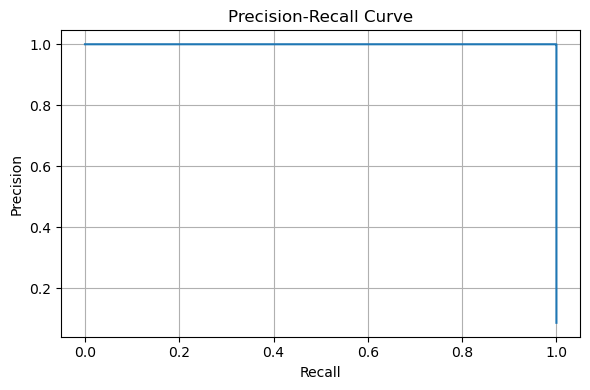

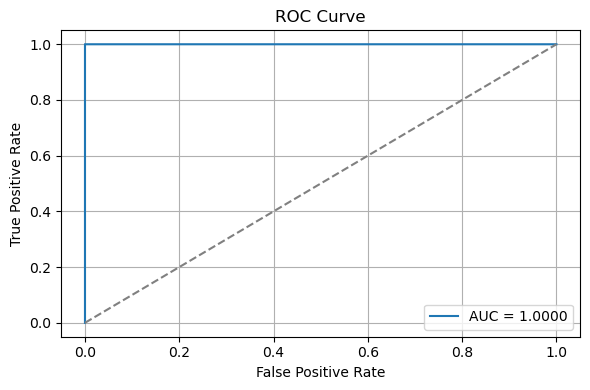

In [44]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


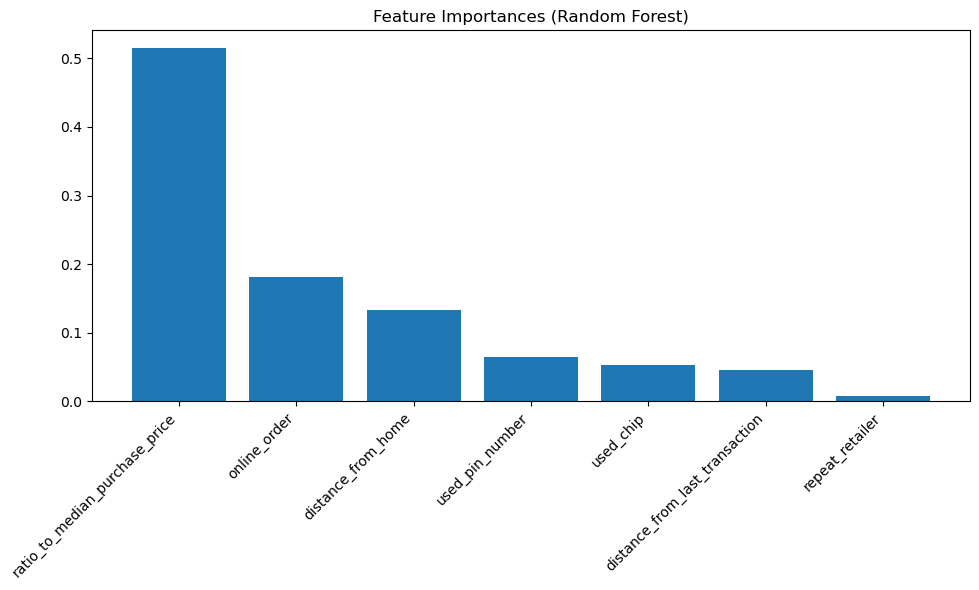

In [45]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = model.feature_importances_
features = X.columns

sorted_idx = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), feature_importances[sorted_idx])
plt.xticks(range(len(features)), features[sorted_idx], rotation=45, ha='right')
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()



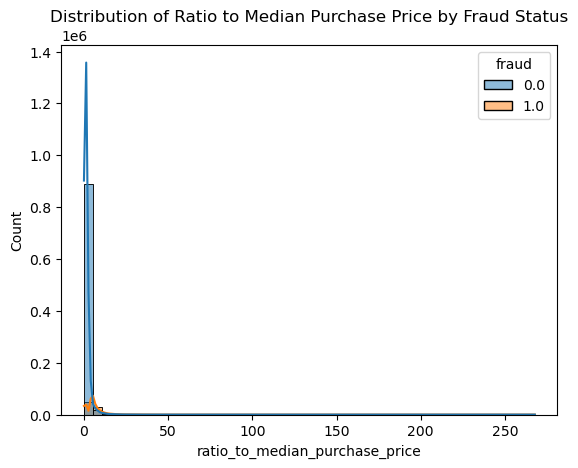

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='ratio_to_median_purchase_price', hue='fraud', bins=50, kde=True)
plt.title('Distribution of Ratio to Median Purchase Price by Fraud Status')
plt.show()

Top features most correlated with 'fraud':
ratio_to_median_purchase_price    0.462305
online_order                      0.191973
distance_from_home                0.187571
distance_from_last_transaction    0.091917
repeat_retailer                  -0.001357
used_chip                        -0.060975
used_pin_number                  -0.100293
Name: fraud, dtype: float64


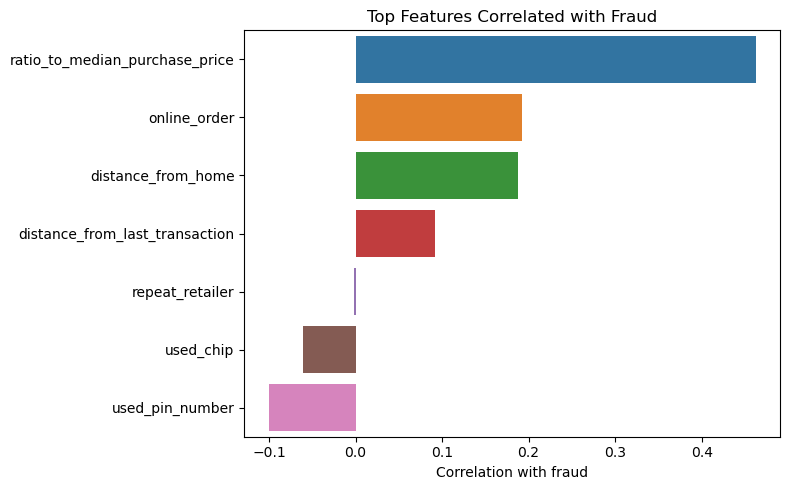

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('card_transdata.csv')

# Combine features and target temporarily
df_corr = X.copy()
df_corr['fraud'] = y

# Define the x predictor variables
X= df.drop(columns=('fraud'),axis=1)

# Define y, target variable
y= df["fraud"]

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Get top features most correlated with 'fraud'
fraud_corr = corr_matrix['fraud'].drop('fraud').sort_values(ascending=False)

# Display top correlated features
print("Top features most correlated with 'fraud':")
print(fraud_corr.head(10))

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_corr.head(10).values, y=fraud_corr.head(10).index)
plt.title("Top Features Correlated with Fraud")
plt.xlabel("Correlation with fraud")
plt.tight_layout()
plt.show()


We checked for data leakage by examining the correlation between each feature and the target variable (fraud). The highest correlation observed was 0.46, with most features showing weak to moderate correlation. No features appeared to leak information about the target or reflect outcomes that would only be known after fraud occurred. Therefore, we found no evidence of data leakage in the dataset.

## Summary of Random Forest Model:

The Random Forest model demonstrated exceptional performance in detecting fraudulent transactions, achieving near-perfect evaluation metrics. The confusion matrix showed only 2 false negatives and zero false positives out of 200,000 test samples, resulting in a precision, specificity, and accuracy of 1.0000, and an F1 score of 0.9999. The model's mean squared error (MSE) was effectively zero, reinforcing its high predictive accuracy. The Precision-Recall (PR) curve and ROC curve both demonstrate near-perfect model performance. The PR curve shows precision remaining close to 1.0 across nearly all recall values. Similarly, the ROC curve has an AUC of 1.000, indicating perfect separability between fraud and non-fraud classes. We were afraid that these values may be due to overfitting or data leakage. 

Due to the large dataset size, we did not use GridSearchCV as it would be too computationally intensive. Instead, we manually tested different values of n_estimators (50, 100, 200) and found that F1 scores remained consistently high at 0.9999, indicating the model is stable with respect to this parameter. No evidence of data leakage was found based on feature correlations with the target variable.
At first, we were afraid that the high evaluation metrics were due to issues including data leakage

This outstanding performance can be largely attributed to the strength of the ratio_to_median_purchase_price feature, which had the highest feature importance in the model. Fraudulent transactions exhibited significantly more variation in this ratio compared to non-fraudulent ones, making it a key indicator for the model. While the results are impressive, the dominance of this single feature suggests the need for caution and further validation to ensure the model remains generalizable and not overly dependent on one variable.

## 0.3.3. SVM Model For the Credit Transdata

Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression tasks. It works by finding the optimal hyperplane that maximally separates data points of different classes, thereby improving generalization. SVM is especially effective in high-dimensional spaces and is robust against overfitting, particularly when there are clear class boundaries.

In this project, we use an SVM with a Radial Basis Function (RBF) kernel, which handles non-linear relationships by mapping inputs into higher-dimensional space. However, SVMs—particularly with non-linear kernels—can be computationally expensive on large datasets.

To enhance efficiency while maintaining predictive power, we apply Principal Component Analysis (PCA) to reduce the feature space before training the model. PCA not only accelerates model training but also preserves the essential structure of the data. This approach follows classroom guidance and enables fast, accurate fraud detection using a representative subset of the training data.

In [51]:

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)



# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_s, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_s)

# Evaluate the model
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Additional metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm):.4f}")

SVM Confusion Matrix:
[[182421    136]
 [   281  17162]]

SVM Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       0.99      0.98      0.99     17443

    accuracy                           1.00    200000
   macro avg       1.00      0.99      0.99    200000
weighted avg       1.00      1.00      1.00    200000

Accuracy: 0.9979
F1 Score: 0.9880


In [52]:
# Calculate Mean Squared Error
mse_svm = mean_squared_error(y_test, y_pred_svm)

print(f"Mean Squared Error (MSE): {mse_svm:.4f}")

Mean Squared Error (MSE): 0.0021


The SVM model performed quite well on the full test set. It had high accuracy, precision, and F1 score. This indicates a strong classification performance.

## Model Comparison

We applied four machine learning models to the credit card fraud detection Dataset: 
1. Logistic Regression
2. Gradient Boost
3. Random Forest and
4. Support Vector Machine (SVM).

Each of the model was trained and evaluated using common classification metrics, then compared based on its ability to accurately identify fraudulent transactions.

1. Logistic Regression served as a baseline linear model. It offered a decent balance of accuracy and interpretability, but its performance was limited by its inability to capture non-linear patterns in the data.

2. Random Forest showed improved performance across all metrics. Its ensemble of decision trees allowed it to model complex, non-linear relationships effectively. It also provided insight into feature importance, which is useful for understanding the drivers of fraud detection.

3. Support Vector Machine (SVM) was implemented using the RBF kernel. It performed competitively and demonstrated strong generalization ability, particularly in terms of precision and specificity. However, it required more computational resources and did not offer the same transparency as Random Forest.

## Conclusion:

Among the four models, Random Forest delivered the most consistent and robust performance across evaluation metrics such as precision, F1-score, and MSE. Therefore, it is recommended as the best model for this fraud detection.

Random Forest and Logist Regression delivered the strongest results. Random Forest is usually ideal when training time is not a constraint and model interpretability is important. SVM offers competitive performance too and Logistic Regression also remains a useful benchmark but is less suited to the complexities of fraud detection in this dataset 